In [7]:
import galkin
import matplotlib.pyplot as plt
import numpy as np
import galkin.plots

In [12]:
# import auxiliary modules
import galkin.processdata   # routines to process kinematic data
import galkin.readparsFile  # routines to read and check input parameters



In [30]:
# Galactic parameters
R0=8.0# Galactocentric distance (kpc)
V0=220.# local circular velocity (km/s)
UsunINUSE=11.10# solar motion in the U-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
VsunINUSE=12.24# solar motion in the V-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
WsunINUSE=07.25# solar motion in the W-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
SYSTDISP=0.# systematic dispersion due to spiral arm streaming (km/s)

In [31]:
# Flags
flagPROPERMOTIONS=0	 			# proper motions not supported in current version - please keep at 0
flagHITERMINAL=0				# whether to use HI terminal velocities
flagFich89tab2=0				# whether to use Fich+ '89, ApJ 342, 272 (1989) (Table 2)
flagMalhotra95=0				# whether to use Malhotra '95, ApJ 448, 138 (1995)
flagMcClureGriffithsDickey07=0			# whether to use McClure-Griffiths & Dickey '07, ApJ 671, 427 (2007)
flagHITHICKNESS=0				# whether to use the HI thickness method
flagHonmaSofue97=0				# whether to use Honma & Sofue '97, PASJ 49, 453 (1997)
flagCOTERMINAL=0				# whether to use CO terminal velocities
flagBurtonGordon78=0				# whether to use Burton & Gordon '78, A&A 63, 7 (1978)
flagClemens85=0					# whether to use Clemens '85, ApJ 295, 422 (1985)
flagKnapp85=0					# whether to use Knapp+ '85, AJ 90, 2 (1985)
flagLuna06=0					# whether to use Luna+ '06, ApJ 641, 938 (2006)
flagHIIREGIONS=1				# whether to use HII regions
flagBlitz79=0					# whether to use Blitz '79, ApJL 231, L115 (1979)
flagFich89tab1=0				# whether to use Fich+ '89, ApJ 342, 272 (1989) (Table 1)	
flagTurbideMoffat93=0				# whether to use Turbide & Moffat '93, AJ 105, 5 (1993)
flagBrandBlitz93=0				# whether to use Brand & Blitz '93, A&A 275, 67 (1993)
flagHou09tabA1=1				# whether to use Hou+ '09, A&A 499, 473 (2009) (Table A1)
flagGMC=1					# whether to use giant molecular clouds
flagHou09tabA2=1				# whether to use Hou+ '09, A&A 499, 473 (2009) (Table A2)
##
flagOPENCLUSTERS=1				# whether to use open clusters
flagFrinchaboyMajewski08=1			# whether to use Frinchaboy & Majewski '08, AJ 136, 118 (2008)
flagPLANETARYNEBULAE=0				# whether to use planetary nebulae
flagDurand98=0					# whether to use Durand+ '98, A&AS 132, 13 (1998)
flagCEPHEIDS=0					# whether to use classical cepheids
flagPont94=0					# whether to use Pont+ '94, A&A 285, 415 (1994)
flagPont97=0					# whether to use Pont+ '97, A&A 318, 416 (1997)
flagCSTARS=0					# whether to use carbon stars
flagDemersBattinelli07=0			# whether to use Demers & Battinelli '07, A&A 473, 143 (2007)
flagBattinelli12=0				# whether to use Battinelli+ '12, Ap 56, 68 (2013)
###
flagMASERS=1					# whether to use masers
flagReid14=1					# whether to use Reid+ '14, ApJ 783, 130 (2014)
flagHonma12=0					# whether to use Honma+ '12, PASJ 64, 136 (2012)
flagStepanishchevBobylev11=0			# whether to use Stepanishchev & Bobylev '11, AstL 37, 4 (2011)
flagXu13=0					# whether to use Xu+ '13, ApJ 769, 15 (2013)
flagBobylevBajkova13=0				# whether to use Bobylev & Bajkova '13, AstL 39, 809 (2013)
flagastropy=0				 	# whether to use astropy for equatorial-to-galactic conversions

In [32]:
inputpars=(R0,V0,UsunINUSE,VsunINUSE,WsunINUSE,SYSTDISP, flagPROPERMOTIONS,flagHITERMINAL,flagFich89tab2,flagMalhotra95,flagMcClureGriffithsDickey07, flagHITHICKNESS,flagHonmaSofue97,flagCOTERMINAL,flagBurtonGordon78,flagClemens85,flagKnapp85,flagLuna06, flagHIIREGIONS,flagBlitz79,flagFich89tab1,flagTurbideMoffat93,flagBrandBlitz93,flagHou09tabA1, flagGMC,flagHou09tabA2,flagOPENCLUSTERS,flagFrinchaboyMajewski08,flagPLANETARYNEBULAE,flagDurand98,flagCEPHEIDS,flagPont94,flagPont97, flagCSTARS,flagDemersBattinelli07,flagBattinelli12, flagMASERS,flagReid14,flagHonma12,flagStepanishchevBobylev11,flagXu13,flagBobylevBajkova13,flagastropy)

In [33]:
galkin.readparsFile.CheckAndPrintParameters(inputpars)

checking validity of input parameters...
printing input parameters...
 R0=  8.0  kpc
 V0=  220.0  km/s
 (Usun,Vsun,Wsun) = ( 11.1 , 12.24 , 7.25 ) km/s
 systematic dispersion =  0.0  km/s
 use HI terminal velocities?            0
 use HI thickness method?               0
 use CO terminal velocities?            0
 use HII regions?                       1
  use Blitz 79?                           0
  use Fich+ 89 (Table 1)?                 0
  use Turbide & Moffat 93?                0
  use Brand & Blitz 93?                   0
  use Hou+ 09 (Table A1)?                 1
 use giant molecular clouds?            1
  use Hou+ 09 (Table A2)?                 1
 use open clusters?                     1
  use Frinchaboy & Majewski 08?           1
 use planetary nebulae?                 0
 use cepheids?                          0
 use C stars?                           0
 use masers?                            1
  use Stepanishchev & Bobylev 11?         0
  use Honma+ 12?                        

In [34]:
vecout=galkin.processdata.ProcessData(inputpars)
totallistvc=vecout[0]

processing HII regions...
 processing Hou+ 09 (Table A1)...
  selected  316  out of the total sample of  815  HII regions
processing giant molecular clouds...
 processing Hou+ 09 (Table A2)...
  selected  30  out of the total sample of  963  giant molecular clouds
processing open clusters...
 processing Frinchaboy & Majewski 08...
  selected  60  out of the total sample of  71  open clusters
processing masers...
 processing Reid+ 14...
  selected  80  out of the total sample of  103  masers


In [35]:
print totallistvc[0]

[6.468873024770224, 0.2366417964765487, 220.67972907604093, 12.325008645747642, 34.11409193394695, 1.4396920440324779, 'Hou09_TableA1']


In [36]:
print totallistvc[len(totallistvc)-1]

[11.118683483501169, 0.3647131137085877, 196.1989200105606, 15.192312773977466, 17.645876897359024, 1.2377224525297543, 'Reid14']


In [37]:
#vcfile = open("/Users/atalia/galkin/bin/output/vcdata.dat",'r')

In [38]:
#print totallistvc

In [39]:
#totallistvc=[]
#i=0
#for line in vcfile:
#    i+=1
#    values=line.split()
#    if(i>2):
#        totallistvc.append([float(values[0]),float(values[1]),float(values[2]),float(values[3]),float(values[4]),float(values[5]),values[6]])

In [40]:
#print totallistvc

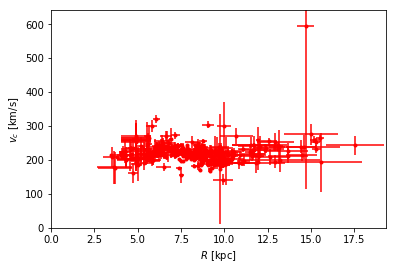

In [41]:
# plot rotation curve measurements
galkin.plots.PlotRotationCurve(totallistvc)

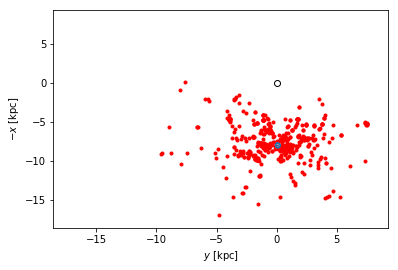

In [42]:
totallistpos=vecout[1]
# plot positions in galactic plane
galkin.plots.PlotPositions(totallistpos)